# Initialization 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bs4
import requests
from collections import defaultdict
%matplotlib inline

file_opioids = 'opioids.csv'
file_overdoses = 'overdoses.csv'
file_prescribers = 'prescriber-info.csv'

In [2]:
opioids = pd.read_csv(file_opioids)
overdoses = pd.read_csv(file_overdoses)
prescribers = pd.read_csv(file_prescribers)

In [3]:
overdoses = overdoses.set_index('State')

In [4]:
overdoses['Population']=overdoses['Population'].str.replace(',', '')
overdoses['Deaths']=overdoses['Deaths'].str.replace(',','')

In [5]:
overdoses[['Population', 'Deaths']]=overdoses[['Population','Deaths']].apply(pd.to_numeric)

In [6]:
max_deaths = overdoses['Deaths'].max()

In [7]:
# per capita measure might be better 
overdoses['Deaths Per Capita'] = overdoses['Deaths']/ overdoses['Population']
max_deaths_per_capita=overdoses['Deaths Per Capita'].max()
min_deaths_per_capita=overdoses['Deaths Per Capita'].min()
print('Max Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print('-'*100)
print('Max Deaths')
print(overdoses.loc[overdoses['Deaths']==max_deaths])
print('-'*100)
print('Min Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==min_deaths_per_capita])
print('-'*100)
print('Descriptions')
print(overdoses['Deaths'].describe())
print(overdoses['Deaths Per Capita'].describe())

Max Deaths Per Capita
               Population  Deaths Abbrev  Deaths Per Capita
State                                                      
West Virginia     1854304     627     WV           0.000338
----------------------------------------------------------------------------------------------------
Max Deaths
            Population  Deaths Abbrev  Deaths Per Capita
State                                                   
California    38332521    4521     CA           0.000118
----------------------------------------------------------------------------------------------------
Min Deaths Per Capita
              Population  Deaths Abbrev  Deaths Per Capita
State                                                     
North Dakota      723393      43     ND           0.000059
----------------------------------------------------------------------------------------------------
Descriptions
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000

In [8]:
# set index to prescriber identification number
prescribers=prescribers.set_index('NPI')

In [9]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita
State,,,,
Virginia,8260405,980,VA,0.000119
Washington,6971406,979,WA,0.000140
West Virginia,1854304,627,WV,0.000338
Wisconsin,5742713,853,WI,0.000149
Wyoming,582658,109,WY,0.000187


In [10]:
prescribers.tail()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1619019353,F,WA,M.D.,Family Practice,0,12,0,0,0,46,...,0,0,0,0,39,0,0,0,0,1
1780693671,F,MI,DO,Internal Medicine,0,15,0,0,0,0,...,0,0,0,0,20,0,0,0,0,1
1346270956,M,AZ,MD,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1518913672,M,NY,M.D.,Dermatology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# rename column because it's confusing
prescribers= prescribers.rename({'State':'Abbrev'}, axis=1);

In [12]:
# add prescriber information to overdose df 
prescribers_per_state = []
for index, row in overdoses.iterrows(): 
    prescribers_per_state.append(prescribers.loc[prescribers['Abbrev']==row['Abbrev']].shape[0])
overdoses['Prescribers'] = prescribers_per_state

In [13]:
# prescribers per capita
overdoses['Prescribers Per Capita'] = overdoses['Prescribers']/overdoses['Population']

In [14]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita,Prescribers,Prescribers Per Capita
State,,,,,,
Virginia,8260405,980,VA,0.000119,568,0.000069
Washington,6971406,979,WA,0.000140,578,0.000083
West Virginia,1854304,627,WV,0.000338,199,0.000107
Wisconsin,5742713,853,WI,0.000149,498,0.000087
Wyoming,582658,109,WY,0.000187,38,0.000065


In [15]:
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print(overdoses.loc[overdoses['Deaths']==max_deaths])

               Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                      
West Virginia     1854304     627     WV           0.000338          199   

               Prescribers Per Capita  
State                                  
West Virginia                0.000107  
            Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                   
California    38332521    4521     CA           0.000118         2562   

            Prescribers Per Capita  
State                               
California                0.000067  


In [16]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']== 'WV']
wv_prescribers[:5]

,Gender,Abbrev,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1831118678,F,WV,MD,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1295753507,M,WV,D.D.S.,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477532679,F,WV,CFNP,Nurse Practitioner,0,0,0,19,0,12,...,0,0,0,0,0,0,12,0,25,1
1417952565,M,WV,DO,Family Practice,0,0,0,18,0,0,...,0,0,0,0,14,0,0,0,0,1
1750505384,F,WV,M.D.,Psychiatry,90,0,0,0,0,0,...,0,0,0,0,0,0,0,27,16,1


In [17]:
# Census Bureau-designated regions and divisions 
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

#divisions
new_england= dict.fromkeys(['CT', 'ME', 'MA', 'NH', 'RI', 'VT'], 'new england')
mid_atlantic = dict.fromkeys(['NJ', 'NY', 'PA'], 'mid atlantic')
east_north_central = dict.fromkeys(['IL', 'IN', 'MI', 'OH', 'WI'],'east north central')
west_north_central = dict.fromkeys(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'], 'west north central')
south_atlantic = dict.fromkeys(['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV'], 'south atlantic')
east_south_central = dict.fromkeys(['AL', 'KY', 'MS', 'TN'], 'east south central')
west_south_central = dict.fromkeys(['AR', 'LA', 'OK', 'TX'], 'west south central')
mountain = dict.fromkeys(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'], 'mountain')
pacific = dict.fromkeys(['AK', 'CA', 'HI', 'OR', 'WA'], 'pacific')

division_list = [new_england, mid_atlantic, east_north_central, west_north_central, south_atlantic, 
            east_south_central, west_south_central, mountain, pacific]
divisions = {}
for div in division_list: 
    divisions.update(div)
    
#regions 
northeast = dict.fromkeys(list(new_england.keys())+list(mid_atlantic.keys()), 'new england')
midwest = dict.fromkeys(list(east_north_central.keys())+list(west_north_central.keys()),'midwest') 
south = dict.fromkeys(list(south_atlantic.keys()) + list(east_south_central.keys()) + list(west_south_central.keys()),'south')
west = dict.fromkeys(list(mountain.keys()) + list(pacific.keys()),'west')

region_list = [northeast, midwest, south, west]
regions = {}
for region in region_list:
    regions.update(region)

In [18]:
overdoses['Region']= overdoses['Abbrev'].map(regions)
overdoses['Division']=overdoses['Abbrev'].map(divisions)

In [19]:
# try scraping to get regions and divisions instead... wikipedia version
url = 'https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States'
regions_req = requests.get(url)
soup = bs4.BeautifulSoup(regions_req.content)
    

/home/rika/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rika/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [129]:
# this list is easier to scrape
url_gov = 'https://www2.census.gov/geo/docs/maps-data/maps/reg_div.txt'
regions_req = requests.get(url_gov)
soup_gov = bs4.BeautifulSoup(regions_req.content)
text = soup_gov.p 

/home/rika/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rika/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [141]:
regions = text.contents[0].split('REGION')[1:]

reg_dict = defaultdict(list)
div_dict = defaultdict(list)
for row in regions: 
    row_by_div = [s for s in row.split('Division') if s!=''] # split on newlines, take out empty strings
    region_name = row_by_div[0].split(':')[1].strip().strip('*').title()
    div_list = [l.split('\r\n') for l in row_by_div[1:]]
    div_list = [[s for s in l if s!=''] for l in div_list]
    for div in div_list:
        division_name = div[0].split(':')[1].strip()
        reg_dict[region_name].append(division_name)
        for i in div[1:]:
            if i[0]=='*': # skip *Prior to June 1984..." line 
                break
            sep = '   '
            state = i.split(sep, 1)[0]
            div_dict[division_name].append(state)  
print(reg_dict)
print()
print(div_dict)

defaultdict(<class 'list'>, {'Northeast': ['New England', 'Middle Atlantic'], 'Midwest': ['East North Central', 'West North Central'], 'South': ['South Atlantic', 'East South Central', 'West South Central'], 'West': ['Mountain', 'Pacific']})

defaultdict(<class 'list'>, {'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'], 'Middle Atlantic': ['New Jersey', 'New York', 'Pennsylvania'], 'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'], 'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 'South Atlantic': ['Delaware', 'District of Columbia (11)', 'Florida', 'Georgia', 'Maryland', 'North Carolina  (37)', 'South Carolina  (45)', 'Virginia', 'West Virginia'], 'East South Central': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'], 'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana',

# Visualizations 

## *Overdose Deaths Per Capita*

Text(0.5,1,'Opioid Overdose Deaths per capita in all 50 States')

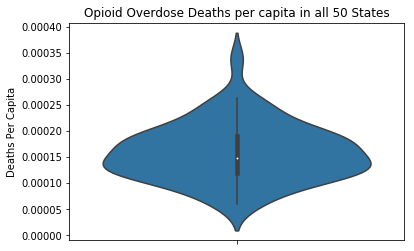

In [22]:
# visualize deaths per capita
dpc_violin = sns.violinplot(y='Deaths Per Capita', data=overdoses)
dpc_violin.set_title('Opioid Overdose Deaths per capita in all 50 States')

In [23]:
overdoses_dpc = overdoses.sort_values('Deaths Per Capita')

Text(0.5,1,'Opioid Overdose Deaths Per Capita by State')

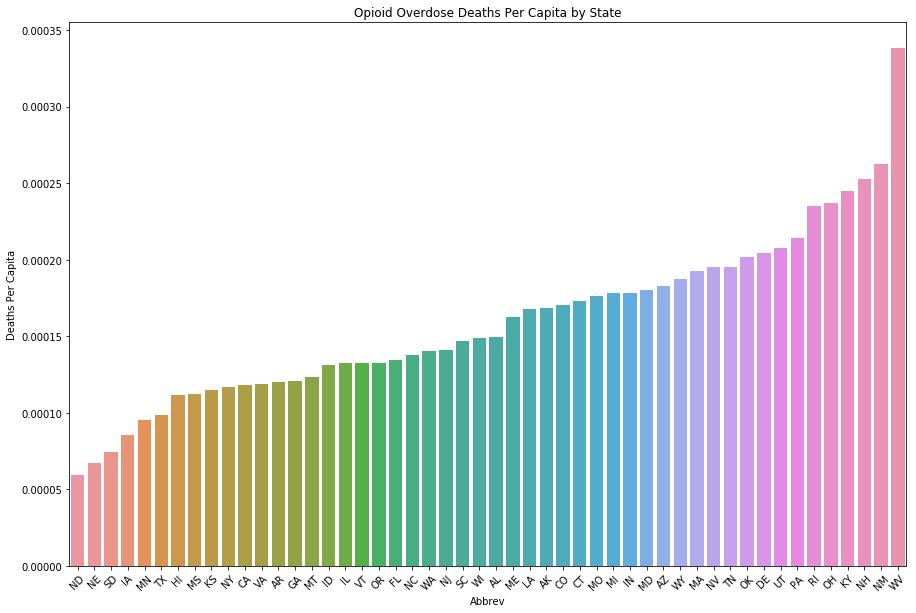

In [24]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Deaths Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Opioid Overdose Deaths Per Capita by State')

## *Providers Per Capita*

Text(0.5,1,'Prescribers Per Capita in all 50 States')

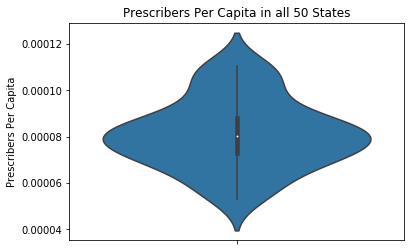

In [25]:
# Visualize prescribers per capita
prescriber_violin = sns.violinplot(y='Prescribers Per Capita', data=overdoses)
prescriber_violin.set_title('Prescribers Per Capita in all 50 States')

Text(0.5,1,'Prescribers Per Capita by State')

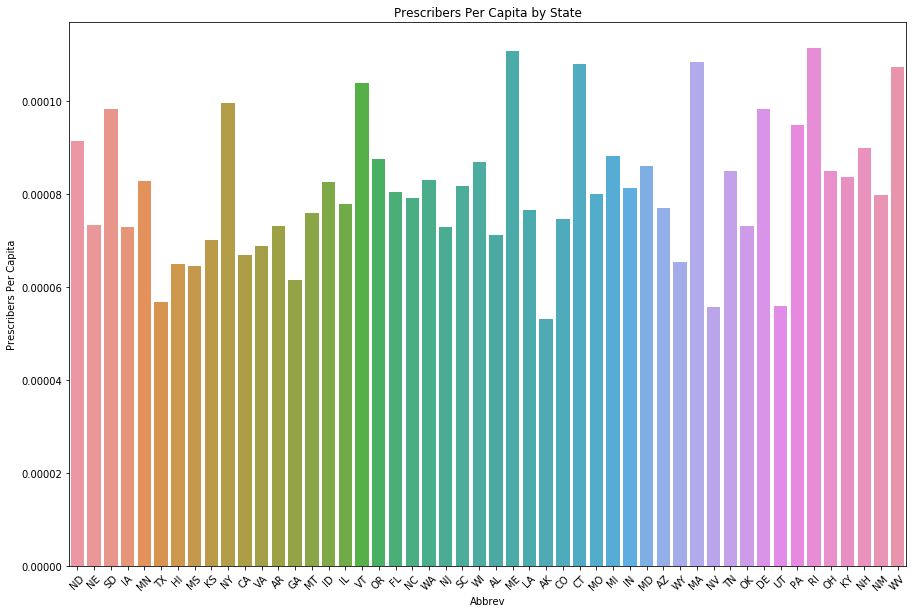

In [26]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Prescribers Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Prescribers Per Capita by State')

Text(0.5,1,'Deaths Per Capita versus Prescribers Per Capita')

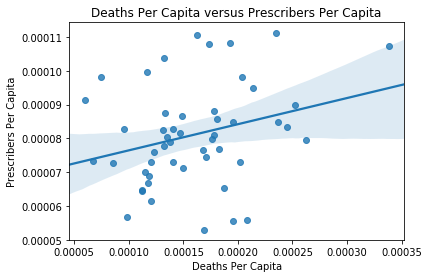

In [27]:
# Opioid overdoses per capita not directly correlated to prescribers per capita
dpc_ppc_line = sns.regplot(x='Deaths Per Capita', y = 'Prescribers Per Capita', data = overdoses)
dpc_ppc_line.set_title('Deaths Per Capita versus Prescribers Per Capita')

# Are there Regional/Divisional Differences?

Text(0.5,1,'Opioid Overdose Deaths per capita by region')

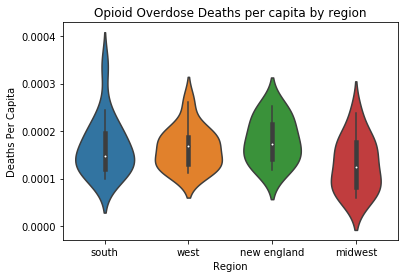

In [20]:
# repeat violin plot for deaths per capita, separate by region 
dpc_region_violin = sns.violinplot(x='Region', y='Deaths Per Capita', data=overdoses)
dpc_region_violin.set_title('Opioid Overdose Deaths per capita by region')

Text(0.5,1,'Prescribers Per Capita by Region')

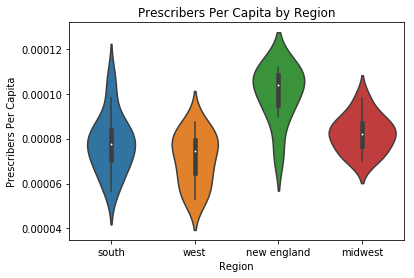

In [21]:
# prescribers per capita by region
prescriber_region_violin = sns.violinplot(x='Region', y='Prescribers Per Capita', data=overdoses)
prescriber_region_violin.set_title('Prescribers Per Capita by Region')

Text(0.5,1,'Non-Opioid vs. Opioid Prescriber by Region')

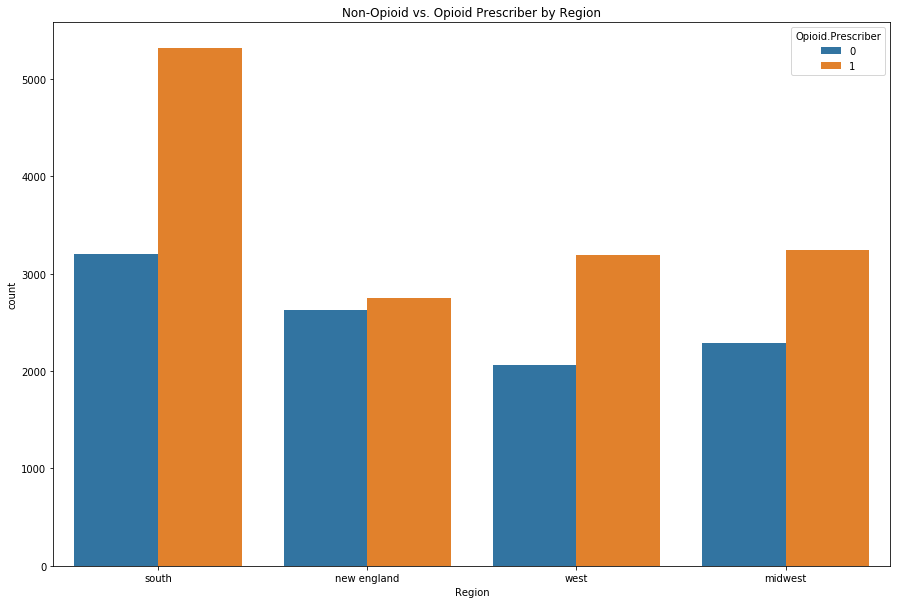

In [30]:
# normalize this
# opioid prescribers vs nonprescribers by region
plt.subplots(figsize=(15,10))
opioid_presc_count = sns.countplot(x='Region', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_count.set_title('Non-Opioid vs. Opioid Prescriber by Region')

## Divisions

Text(0.5,1,'Opioid Overdose Deaths per capita by Division')

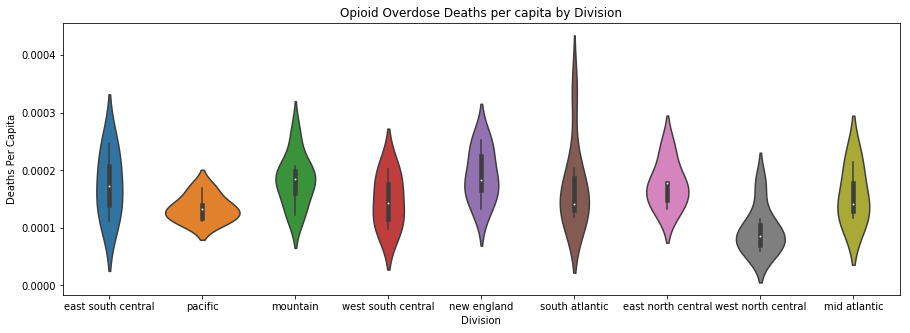

In [31]:
# repeat violin plot for deaths per capita, separate by region 
plt.subplots(figsize=(15,5))
dpc_division_violin = sns.violinplot(x='Division', y='Deaths Per Capita', data=overdoses)
dpc_division_violin.set_title('Opioid Overdose Deaths per capita by Division')

Text(0.5,1,'Prescribers Per Capita by Division')

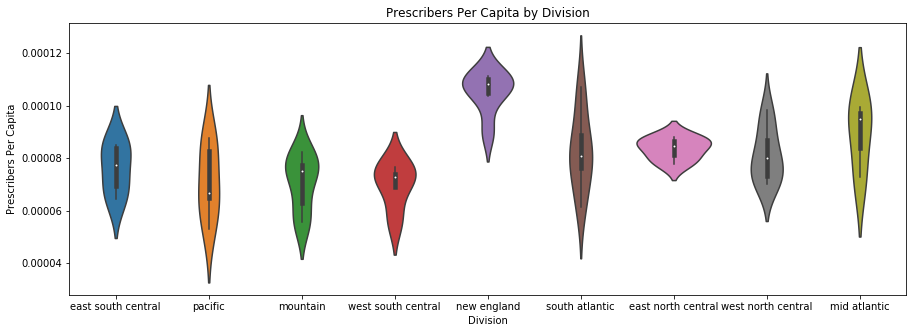

In [32]:
# prescribers per capita by division
plt.subplots(figsize=(15,5))
prescriber_division_violin = sns.violinplot(x='Division', y='Prescribers Per Capita', data=overdoses)
prescriber_division_violin.set_title('Prescribers Per Capita by Division')

Text(0.5,1,'Non-Opioid vs. Opiod Prescribers by division')

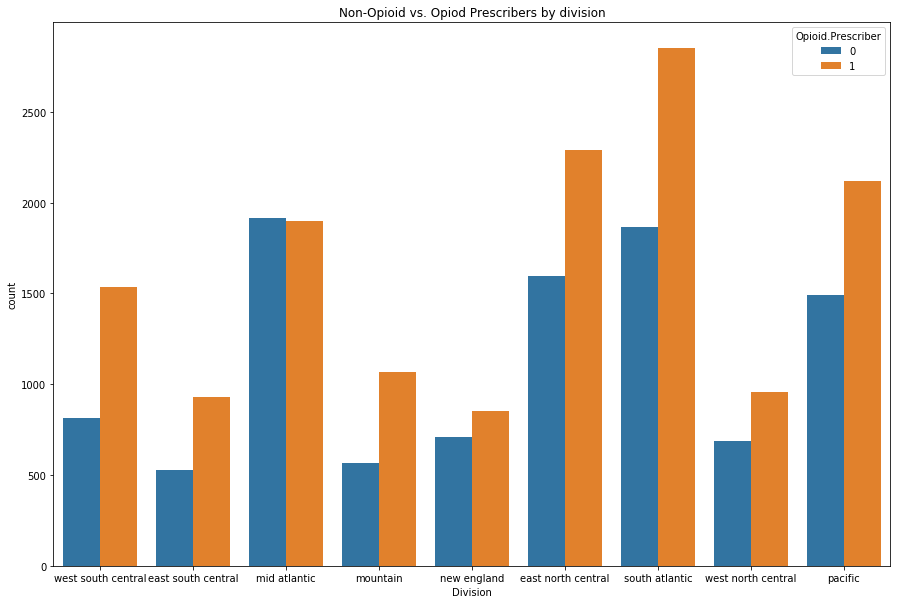

In [33]:
# opioid prescribers vs nonprescribers by division
plt.subplots(figsize=(15,10))
opioid_presc_bar = sns.countplot(x='Division', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_bar.set_title('Non-Opioid vs. Opiod Prescribers by division')

# Medical Practitioners and the Drugs they Prescribe

In [33]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']=='WV'] # prescribers of highest per capita death rate state
nd_prescribers = prescribers.loc[prescribers['Abbrev']=='ND'] # prescribers of lowest per capita death rate state 

In [35]:
wv_prescribers.describe()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3.301508,1.874372,0.231156,8.809045,0.180905,6.025126,11.221106,31.361809,2.572864,6.030151,...,2.919598,2.793970,1.105528,1.613065,26.467337,3.567839,7.110553,1.658291,13.391960,0.633166
std,18.844112,7.819898,1.619588,23.129056,1.465922,16.537511,31.155384,138.570041,12.244292,15.192339,...,12.060184,12.933894,7.582803,8.577397,87.937292,19.432977,19.456448,9.243825,41.724289,0.483156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,196.000000,65.000000,12.000000,212.000000,12.000000,112.000000,192.000000,1728.000000,109.000000,89.000000,...,91.000000,145.000000,96.000000,77.000000,779.000000,218.000000,104.000000,106.000000,454.000000,1.000000


(199, 255)


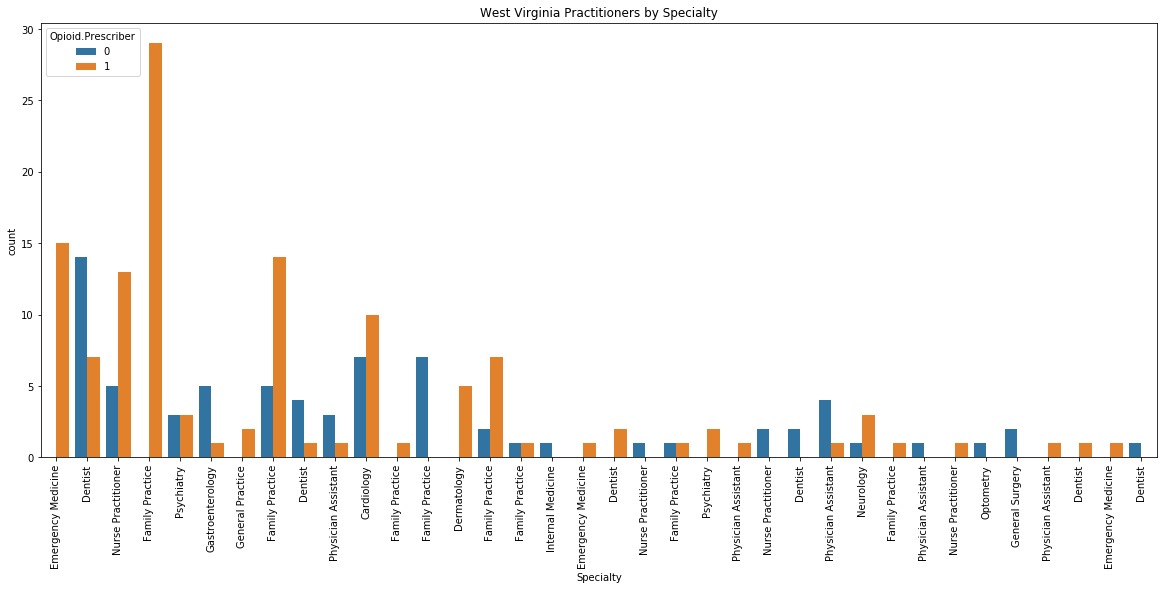

In [38]:
plt.subplots(figsize=(20,8))

wv_opioid_prescribers_byspecialty = sns.countplot(x='Specialty', hue = 'Opioid.Prescriber', data = wv_prescribers)
wv_opioid_prescribers_byspecialty.set_title('West Virginia Practitioners by Specialty')
wv_opioid_prescribers_byspecialty.set_xticklabels(wv_prescribers.Specialty, rotation = 90)
print(wv_prescribers.shape)

In [37]:
nd_prescribers.describe()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.606061,2.181818,1.272727,9.954545,0.939394,12.939394,15.348485,8.090909,2.469697,5.727273,...,3.621212,2.000000,0.924242,0.787879,27.787879,1.424242,4.363636,0.787879,7.348485,0.590909
std,5.448723,9.488307,5.484371,23.246791,4.653795,28.258085,34.467149,27.917310,7.465242,17.651799,...,8.796442,7.306478,4.581940,4.521794,63.612895,8.061419,13.633258,6.400758,19.755032,0.495434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.250000,0.000000,0.000000,0.000000,0.000000,1.000000
max,28.000000,68.000000,31.000000,123.000000,31.000000,105.000000,168.000000,203.000000,30.000000,106.000000,...,46.000000,40.000000,30.000000,29.000000,360.000000,62.000000,65.000000,52.000000,112.000000,1.000000


(66, 255)


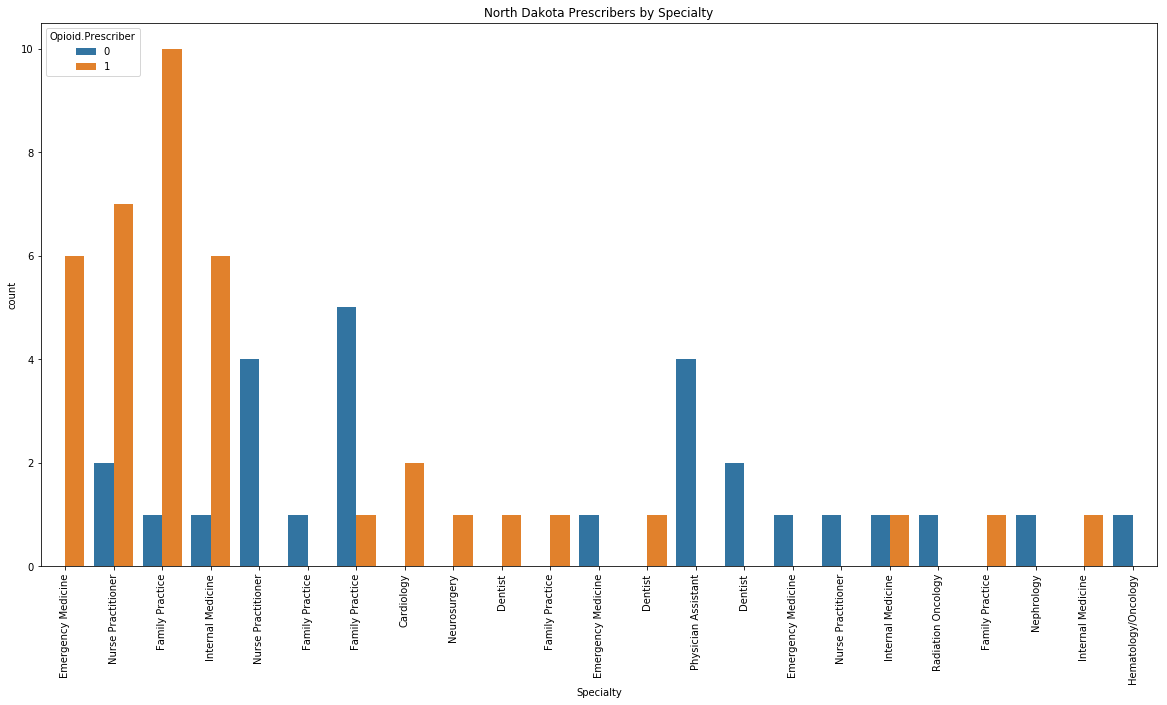

In [37]:
plt.subplots(figsize=(20,10))

nd_opioid_prescribers_byspecialty = sns.countplot(x='Specialty', hue = 'Opioid.Prescriber', data = nd_prescribers)
nd_opioid_prescribers_byspecialty.set_title('North Dakota Prescribers by Specialty')
nd_opioid_prescribers_byspecialty.set_xticklabels(nd_prescribers.Specialty, rotation=90)
print(nd_prescribers.shape)

### Number of Prescribers in each state

In [39]:
print(prescribers.shape)

(25000, 255)


Text(0.5,1,'Number of Prescribers per State')

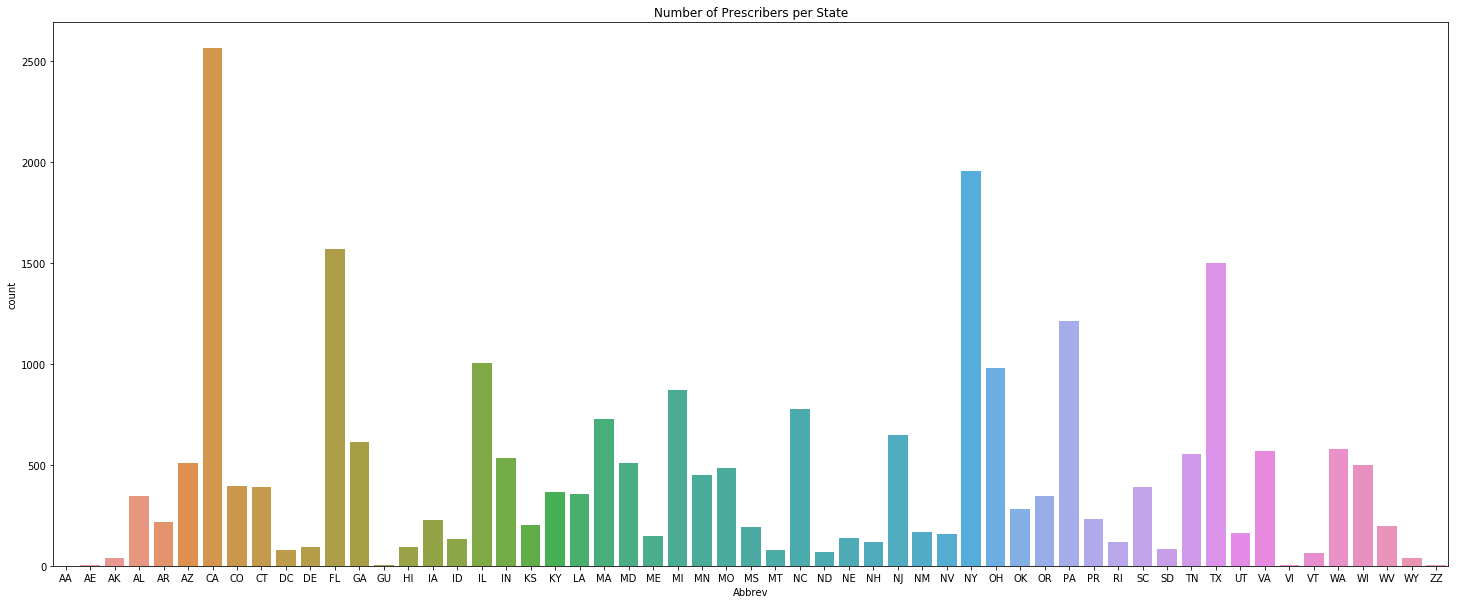

In [56]:
plt.subplots(figsize=(25,10))
practitioner_count = sns.countplot(x='Abbrev', data=prescribers.sort_values('Abbrev'))
practitioner_count.set_title('Number of Prescribers per State')

### Legend for some unfamiliar abbreviations:
* AA - Armed Forces Americas 
* AE - Armed Forces Africa
* GU - Guam
* VI - US Virgin Islands
* ZZ - ???

## Specialties with many prescribers 

### At least 100 prescribers: 

In [153]:
specialty_counts = prescribers.Specialty.value_counts()
print('Total specialties recorded: {}'.format(len(specialty_counts)))
print('Specialties with > 100 prescribers recorded: {}'.format(len(specialty_counts[specialty_counts > 100])))

Total specialties recorded: 109
Specialties with > 100 prescribers recorded: 33


In [154]:
specialty_counts[specialty_counts > 100].describe()

count      33.000000
mean      713.484848
std       883.124252
min       117.000000
25%       218.000000
50%       369.000000
75%       615.000000
max      3194.000000
Name: Specialty, dtype: float64

In [155]:
specialty_counts[specialty_counts > 100]

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro

### At least 50 prescribers

In [169]:
specialty_counts[specialty_counts > 50].describe()

count      43.000000
mean      564.162791
std       818.292616
min        52.000000
25%       119.000000
50%       260.000000
75%       559.000000
max      3194.000000
Name: Specialty, dtype: float64

In [170]:
specialty_counts[specialty_counts > 50]

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro

# Which drugs are prescribed most often? 

In [163]:
tracked_drugs = list(prescribers.columns)[4:-1]
# Which drugs are most often prescribed? 
prescribers[tracked_drugs].aggregate(sum).sort_values(ascending = False)

LISINOPRIL                        1176243
LEVOTHYROXINE.SODIUM              1144724
AMLODIPINE.BESYLATE               1107865
SIMVASTATIN                       1032511
OMEPRAZOLE                        1012238
ATORVASTATIN.CALCIUM               988910
HYDROCODONE.ACETAMINOPHEN          958082
FUROSEMIDE                         828161
METFORMIN.HCL                      715162
METOPROLOL.TARTRATE                657013
GABAPENTIN                         654491
LOSARTAN.POTASSIUM                 553719
HYDROCHLOROTHIAZIDE                536818
METOPROLOL.SUCCINATE               522404
WARFARIN.SODIUM                    479951
CLOPIDOGREL                        452530
PRAVASTATIN.SODIUM                 451433
CARVEDILOL                         415007
TRAMADOL.HCL                       406693
ALPRAZOLAM                         403203
ATENOLOL                           394700
POTASSIUM.CHLORIDE                 385786
TAMSULOSIN.HCL                     367304
PANTOPRAZOLE.SODIUM               

## TODO: 
* Use opiods.csv to identify which of the items in tracked_drugs are opioids. 

In [164]:
#Let's take a look at Hydrocodone/ Acetaminophen, aka Vicodin, a well-known opioid 
vicodin_prescribers = prescribers[prescribers['HYDROCODONE.ACETAMINOPHEN']!=0]

In [166]:
vicodin_prescribers.shape

(10044, 255)

In [167]:
vicodin_specialty_counts = vicodin_prescribers.Specialty.value_counts()

In [168]:
vicodin_specialty_counts

Family Practice                                                   2120
Internal Medicine                                                 1639
Physician Assistant                                                836
Nurse Practitioner                                                 824
Emergency Medicine                                                 810
Dentist                                                            679
Orthopedic Surgery                                                 489
General Surgery                                                    317
Urology                                                            186
Podiatry                                                           143
Physical Medicine and Rehabilitation                               131
Hematology/Oncology                                                122
Neurology                                                          113
Oral Surgery (dentists only)                                       109
Otolar